In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

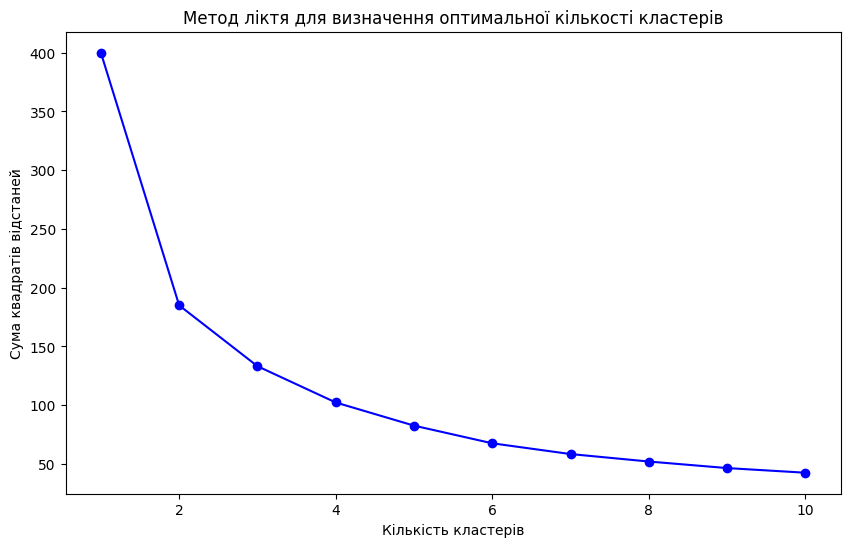

In [3]:
df = pd.read_csv("D:\Projects\Data\cluster_data\data_2d.csv", header=None)

# Вибір колонок за числовим індексом
X = df[[1, 2]]

# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визначення оптимальної кількості кластерів за допомогою методу ліктя
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

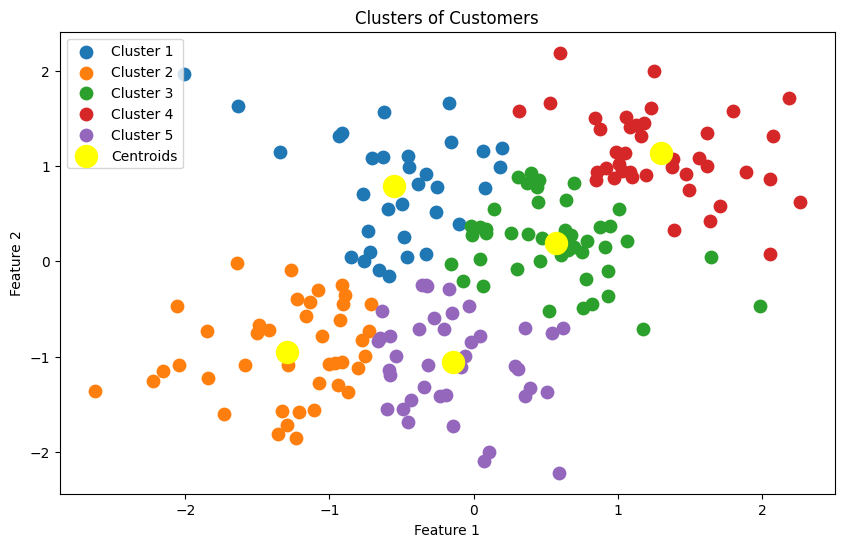

In [5]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=80, label=f'Cluster {i+1}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()